In [2]:
import pandas            as pd 
import numpy             as np
import scipy             as sp
import seaborn           as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use="ggplot"
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
data.head ()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
"""
icionário de variáveis(colunas da tabela)
id -- índices de registros

date -- datas dos registros

price -- preço das casas

bedrooms-- números de quartos de dormir

bathrooms-- número de banheiros

floors -- número de andares

waterfront -- na beira do mar

view -- Vista para paisagens

condition -- Doenças que atingem o local

grade -- graus

lat -- latitude

long -- longitude

(EDA)-- Análise exploratória de dados
"""

'\nicionário de variáveis(colunas da tabela)\nid -- índices de registros\n\ndate -- datas dos registros\n\nprice -- preço das casas\n\nbedrooms-- números de quartos de dormir\n\nbathrooms-- número de banheiros\n\nfloors -- número de andares\n\nwaterfront -- na beira do mar\n\nview -- Vista para paisagens\n\ncondition -- Doenças que atingem o local\n\ngrade -- graus\n\nlat -- latitude\n\nlong -- longitude\n\n(EDA)-- Análise exploratória de dados\n'

In [8]:
data.info() #informação de cada tipo de dados nas colunas do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
data.describe() #estatística descrita dos dados

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
data.isnull().sum() #identificando se há valores nulos nos dados

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
correlacao = data.corr() #instânciando as correlações dos dados na variável correlação

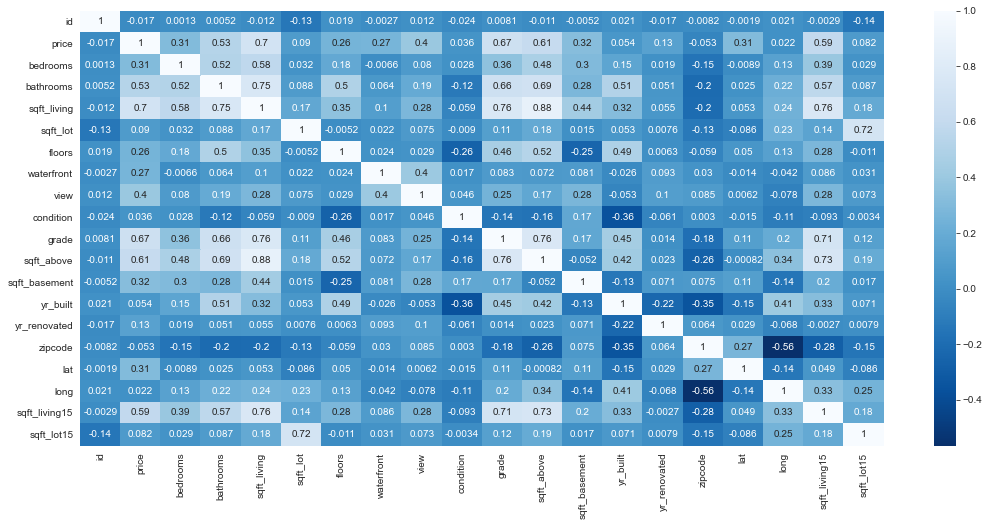

In [13]:
# plotando a figura das correlações 
plt.figure (figsize=(18,8))
sns.heatmap (correlacao, annot= True,cmap='Blues_r');

In [14]:
"""
Quanto mais próximo de 1 é o valor , logo se tem uma forte correlação positiva.

•Quanto mais próximo de -1 é o valor,logo se tem uma forte correlação negativa.
"""

'\nQuanto mais próximo de 1 é o valor , logo se tem uma forte correlação positiva.\n\n•Quanto mais próximo de -1 é o valor,logo se tem uma forte correlação negativa.\n'

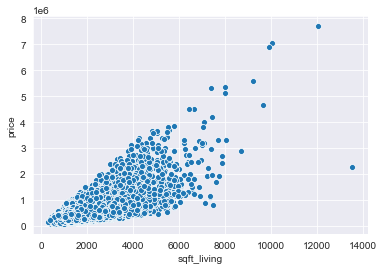

In [17]:
# pés quadrados vivos x preço 
sns.scatterplot(data.sqft_living,data.price);

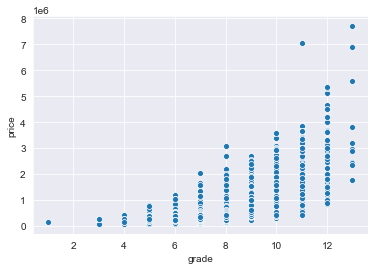

In [18]:
sns.scatterplot(data.grade,data.price);

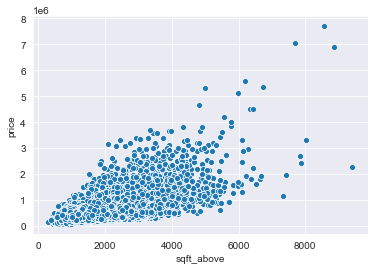

In [19]:
sns.scatterplot(data.sqft_above,data.price);

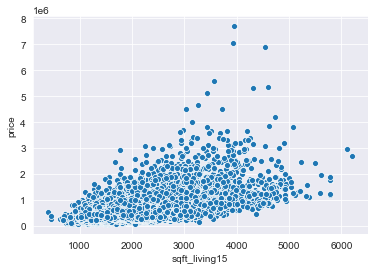

In [20]:
sns.scatterplot (data.sqft_living15,data.price);

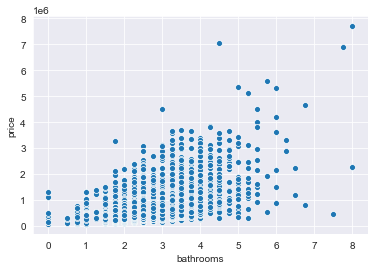

In [21]:
sns.scatterplot (data.bathrooms,data.price);

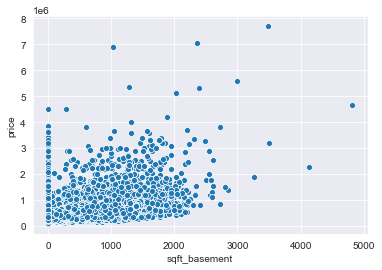

In [22]:
sns.scatterplot(data.sqft_basement,data.price);

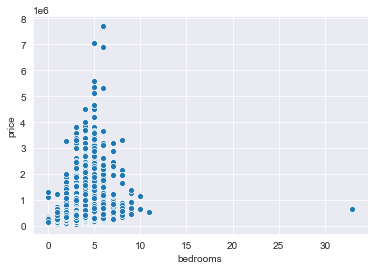

In [23]:
sns.scatterplot(data.bedrooms,data.price);

In [25]:
#Análise estatística da variável independente mais linear à variável alvo

#(pés quadrados vivos) estatística descritiva da variável independente mais linear a variável alvo
data.sqft_living.describe().to_frame ()

,sqft_living
count,21613.000000
mean,2079.899736
std,918.440897
min,290.000000
25%,1427.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


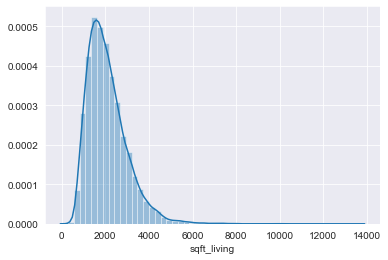

In [27]:
sns.distplot(data.sqft_living);

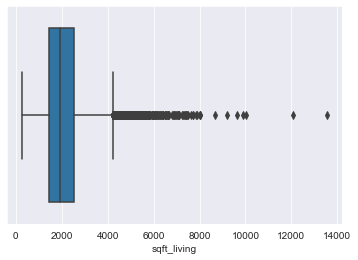

In [28]:
sns.boxplot(data.sqft_living);

In [29]:
data.price.describe().to_frame ()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


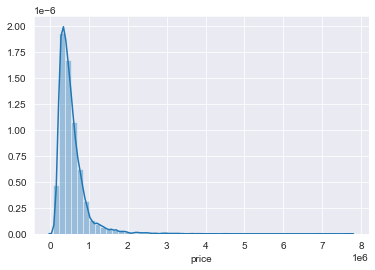

In [30]:
sns.distplot(data.price);

In [31]:
#visualização da assimetria da variável preço

In [32]:
from scipy import stats

In [34]:
# imprime o coeficiente de pearson
print ("Valor maior que 1 implica em distribuição assimétrica positiva")
print ("")
stats.skew(data.price)

Valor maior que 1 implica em distribuição assimétrica positiva



4.023789858140135

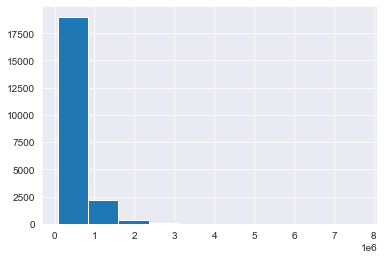

In [35]:
plt.hist(data.price);

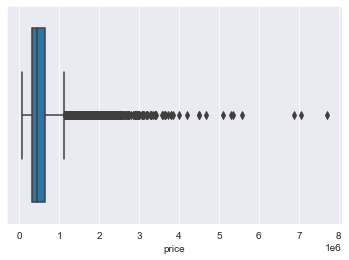

In [37]:
#Identificação de valores outliers
sns.boxplot(data.price);

In [38]:
data[["sqft_living","price"]].nlargest(1465,"price")

,sqft_living,price
7252,12050,7700000.0
3914,10040,7062500.0
9254,9890,6885000.0
4411,9200,5570000.0
1448,8000,5350000.0
...,...,...
3282,3150,1003000.0
8177,2290,1003000.0
19194,2230,1003000.0
19024,3100,1001000.0


In [39]:
#Tratando valores outliers
outlier1465 = data.nlargest(1465, 'price').index

In [40]:
outlier1465

Int64Index([ 7252,  3914,  9254,  4411,  1448,  1315,  1164,  8092,  2626,
             8638,
            ...
            21606,  8819, 11980, 14192, 15587,  3282,  8177, 19194, 19024,
             2717],
           dtype='int64', length=1465)

In [41]:
data.drop(outlier1465,inplace=True)

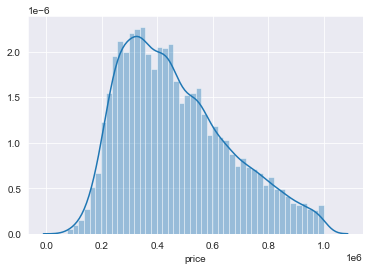

In [42]:
sns.distplot(data.price);

In [43]:
# imprime o coeficiente de pearson
print("Valor entre (-1) e (1) distribuição simétrica")
print ("")
stats.skew(data.price)

Valor entre (-1) e (1) distribuição simétrica



0.6265762804072541

In [44]:
data.head ()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
#Criação do Modelo de aprendizado de máquina supervisionado para previsão
# Instânciando o atributo preditor a variável X
X = np.array (data["sqft_living"])

In [46]:
# Instânciando a variável alvo em y 
y = np.array (data["price"])

In [47]:
#Importes das bibliotecas para criação dos modelos de aprendizado de máquina
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_squared_error
from math             import sqrt

In [48]:
#Separação dos dados de treino e teste
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.20,random_state=5)

In [49]:
#Remodelando os dados de treino para um formato reconhecível ao modelo

X_treino = X_treino.reshape(-1,1)
y_treino = y_treino.reshape(-1,1)

In [50]:
#Tamanho de corpo dos dados de treino e teste
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((16118, 1), (4030,), (16118, 1), (4030,))

In [51]:
#Aplicação do aprendizado de máquina

In [52]:
#Instância do modelo de Regressão Linear 
Lreg = LinearRegression ()

In [53]:
# Ensinando a máquina com dados de treino
Lreg.fit(X_treino,y_treino)

LinearRegression()

In [54]:
#Remodelando os dados de teste para um formato reconhecível ao modelo
X_teste  = X_teste.reshape (-1,1) 
y_teste  = y_teste.reshape (-1,1)

In [55]:
#Coeficiente da regressão linear
Lreg.coef_

array([[156.96624484]])

In [56]:
#Valor numérico que traça a reta da regressão linear
Lreg.intercept_

array([160479.61867377])

In [57]:
#Previsão do modelo nos dados de teste

In [58]:
# previsão do modelo e retorno na variável pred
pred = Lreg.predict (X_teste)

In [59]:
#Avaliação do modelo de regressão com : Erro Médio Quadrado

In [60]:
rmse = float(format(np.sqrt(mean_squared_error(y_teste,pred)),'.3f'))

In [61]:
print("RMSE:{}".format(rmse))

RMSE:158066.123


In [62]:
#O modelo erra em torno de 158 mil dólares acima ou abaixo em suas previsões.
#Vale pensar se é benéfico este valor a estratégia e expectativa do mercado que se deseja alcançar, sendo ele "fictício aqui ;) "

In [63]:
#Visualização gráfica da regressão linear

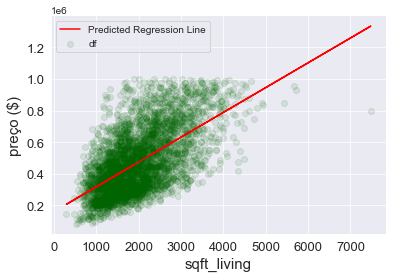

In [64]:
plt.scatter(X_teste,y_teste,color='darkgreen',label="df", alpha=.1)
plt.plot(X_teste,Lreg.predict(X_teste),color="red",label="Predicted Regression Line")
plt.xlabel("sqft_living", fontsize=15)
plt.ylabel("preço ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [65]:
#Salvando o modelo de aprendizado de máquina com a biblioteca " PICKLE "
import pickle

In [66]:
# Salva o modelo
with open ("Lreg.pkl","wb") as file:
    pickle.dump(Lreg,file)

In [67]:
# Carrega o modelo
with open ("Lreg.pkl","rb") as f:
    model = pickle.load(f)

In [68]:
# Reutilização do modelo salvo 
model.predict (X_teste)

array([[519932.31936624],
       [568591.85526784],
       [364535.73697081],
       ...,
       [381802.02390363],
       [866042.88924698],
       [457145.82142869]])